In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import plotly.express as px

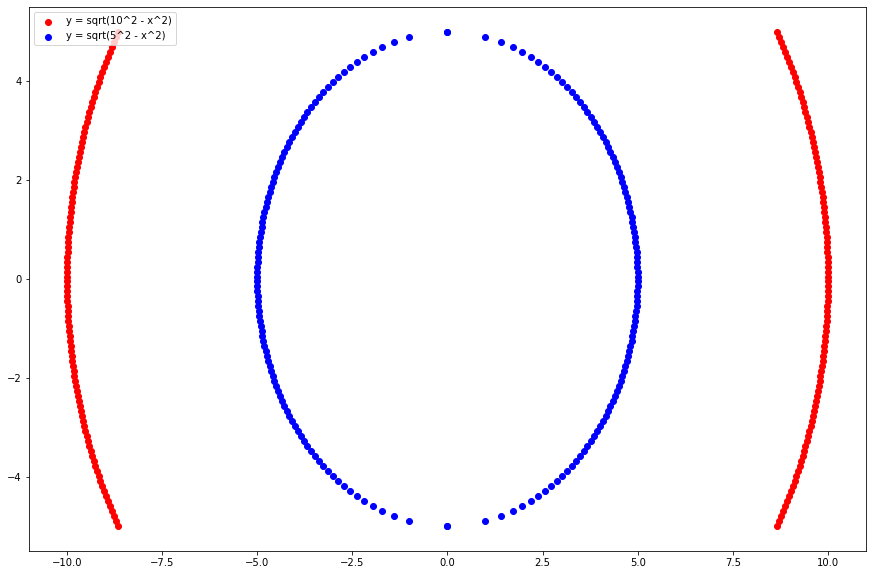

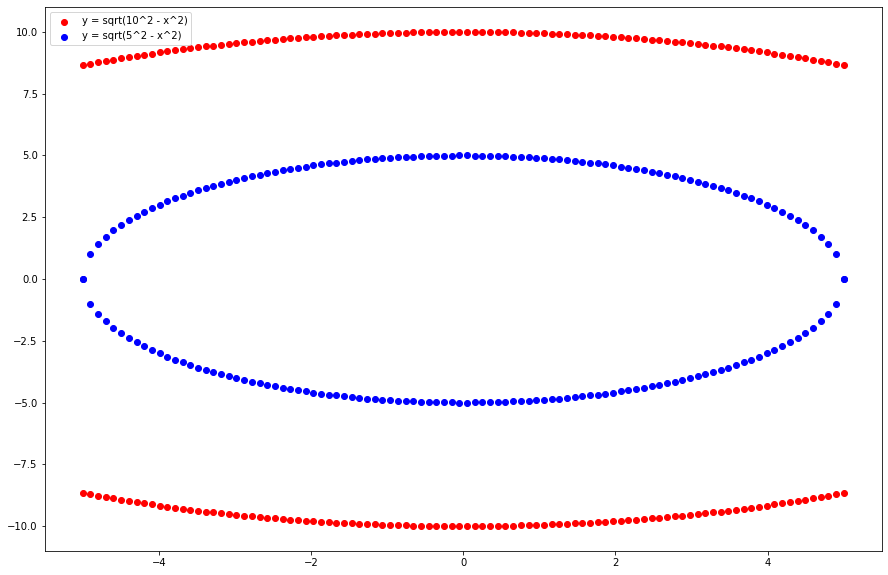

         X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0
Accuracy of SVM linear kernel classifier on test data: 0.55
Accuracy of SVM rbf kernel classifier on test data: 1.00


In [75]:
x = np.linspace(-5.0, 5.0, 100) # 100 linearly spaced numbers
y = np.sqrt(10**2 - x**2) 
y = np.hstack([y, -y])  # first set of points
x = np.hstack([x, -x])

x_1 = np.linspace(-5.0, 5.0, 100)
y_1 = np.sqrt(5**2 - x_1**2)
y_1 = np.hstack([y_1, -y_1])    # second set of points
x_1 = np.hstack([x_1, -x_1])

plt.figure(figsize=(15, 10))
plt.scatter(y, x, color='red', label='y = sqrt(10^2 - x^2)')
plt.scatter(y_1, x_1, color='blue', label='y = sqrt(5^2 - x^2)')
plt.legend(loc='upper left')

plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='red', label='y = sqrt(10^2 - x^2)')
plt.scatter(x_1, y_1, color='blue', label='y = sqrt(5^2 - x^2)')
plt.legend(loc='upper left')
plt.show()

df_1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df_1['Y'] = 0

df_2 = pd.DataFrame(np.vstack([y_1, x_1]).T, columns=['X1', 'X2'])
df_2['Y'] = 1

df = df_1.append(df_2)
print(df.head())

# Independent and dependent features
X = df.iloc[:, :-1]
y = df.Y

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

SVM_classifier_linear = SVC(kernel='linear')
SVM_classifier_linear.fit(X_train, y_train)

linear_y_predict = SVM_classifier_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_y_predict)
print('Accuracy of SVM linear kernel classifier on test data: {:.2f}'.format(linear_accuracy))

SVM_classifier_rbf = SVC(kernel='rbf')
SVM_classifier_rbf.fit(X_train, y_train)
rbf_y_predict = SVM_classifier_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_y_predict)
print('Accuracy of SVM rbf kernel classifier on test data: {:.2f}'.format(rbf_accuracy))

#### ***Polynomial kernel***
$$ K(x, y) = (x^{T}y + c)^{d} $$
$x \text{ is } (x_{1} \text{ and } x_{2}) \text{ features}$
$$ \\ $$ 
$y \text{ is } (x_{1} \text{ and } x_{2}) \text{ features}$
$$ \\ $$
$d \text{ is number of wights in problem}$

#### ***Radial basis function (rbf) kernel***
$$ K(x, y) = \exp \left(-{\frac {\|\mathbf {x} -\mathbf {y} \|^{2}}{2\sigma ^{2}}}\right) $$


####  ***Guassian kernel*** seems to be similar to rbf kernel ! :thinking:


In [53]:
# Calculating x^T * y matrix values
df["X1_Squared"] = df.X1**2
df["X2_Squared"] = df.X2**2
df["X1 * X2"] = df.X1*df.X2
print(df.head())

# Independent and dependent features
X = df.iloc[:, :-1]
y = df.Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# X_train, y_train

fig = px.scatter_3d(df, x="X1", y="X2", z="X1 * X2", color="X1")
fig.show()

fig = px.scatter_3d(df, x="X1_Squared", y="X2_Squared", z="X1 * X2", color="X1")
fig.show()

         X1       X2  Y  X1_Squared  X2_Squared    X1 * X2
0  8.660254 -5.00000  0   75.000000   25.000000 -43.301270
1  8.717792 -4.89899  0   75.999898   24.000102 -42.708375
2  8.773790 -4.79798  0   76.979390   23.020610 -42.096467
3  8.828277 -4.69697  0   77.938476   22.061524 -41.466150
4  8.881281 -4.59596  0   78.877155   21.122845 -40.818009


sklearn:


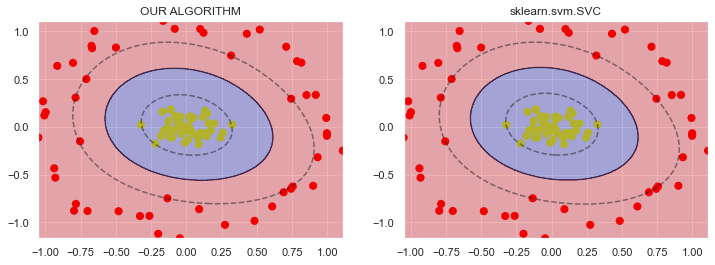

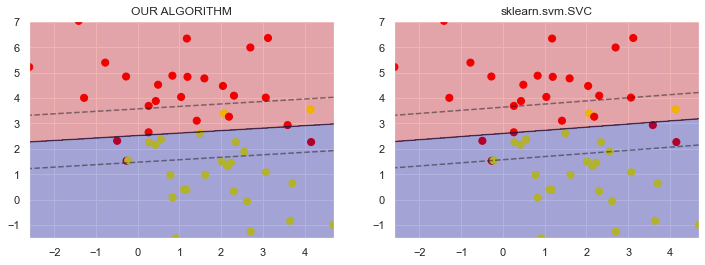

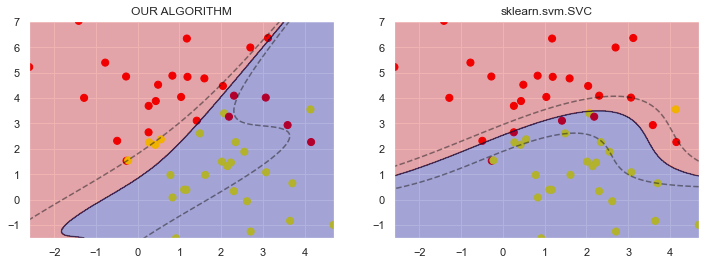

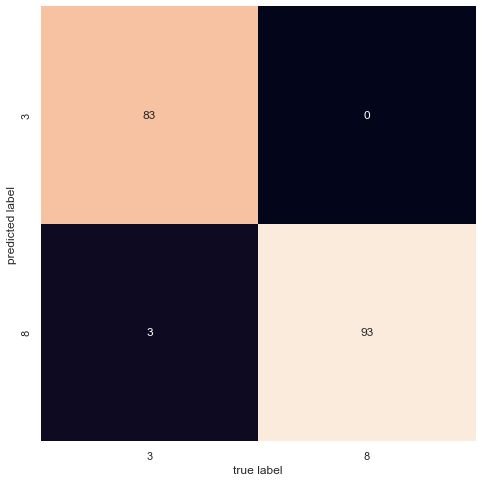

custom svm:


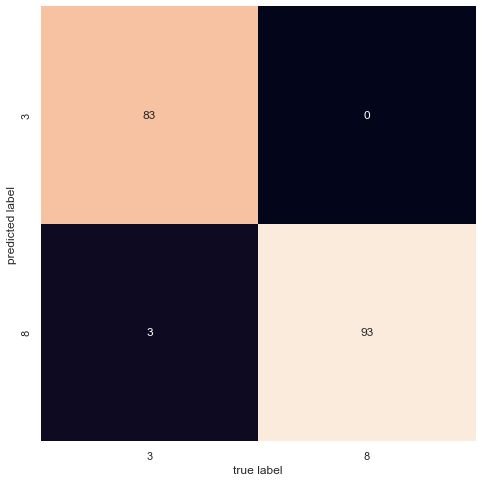

kernel: linear, C: 1.0, max_iter: 60, gamma: None


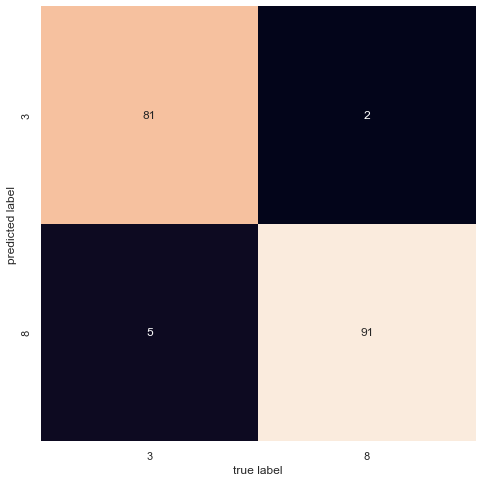

kernel: rbf, C: 1.0, max_iter: 60, gamma: 0.001


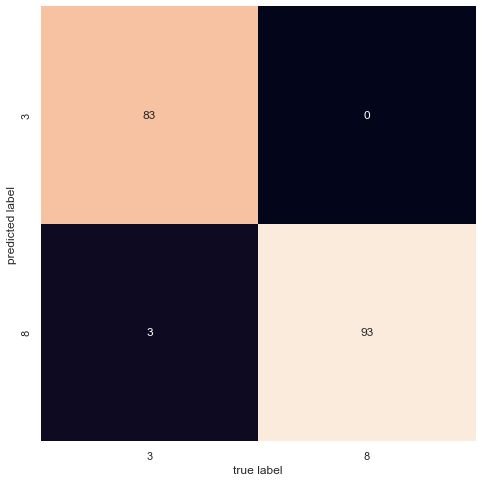

kernel: poly, C: 1.0, max_iter: 60, gamma: 3


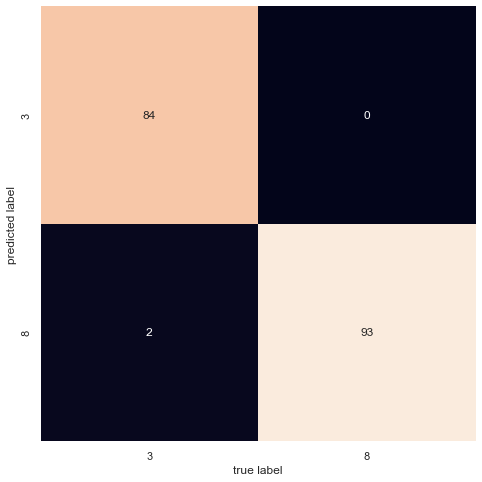

In [80]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs, make_circles
from sklearn import datasets, svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np


class SVM:
    def __init__(self, kernel='linear', C=10000.0, max_iter=100000, degree=3, gamma=1):
        self.kernel = {'poly': lambda x, y: np.dot(x, y.T)**degree,
                       'rbf': lambda x, y: np.exp(-gamma*np.sum((y-x[:, np.newaxis])**2, axis=-1)),
                       'linear': lambda x, y: np.dot(x, y.T)}[kernel]
        self.C = C
        self.max_iter = max_iter

    #   t,
    def restrict_to_square(self, t, v0, u):
        t = (np.clip(v0 + t*u, 0, self.C) - v0)[1]/u[1]
        return (np.clip(v0 + t*u, 0, self.C) - v0)[0]/u[0]

    def fit(self, X, y):
        self.X = X.copy()
        #   0,1  -1,+1;     sklearn
        self.y = y * 2 - 1
        self.lambdas = np.zeros_like(self.y, dtype=float)
        #  (3)
        self.K = self.kernel(self.X, self.X) * self.y[:, np.newaxis] * self.y

        #  self.max_iter
        for _ in range(self.max_iter):
            #
            for idxM in range(len(self.lambdas)):
                # idxL
                idxL = np.random.randint(0, len(self.lambdas))
                #  (4)
                Q = self.K[[[idxM, idxM], [idxL, idxL]],
                           [[idxM, idxL], [idxM, idxL]]]
                #  (4a)
                v0 = self.lambdas[[idxM, idxL]]
                #  (4b)
                k0 = 1 - np.sum(self.lambdas * self.K[[idxM, idxL]], axis=1)
                #  (4d)
                u = np.array([-self.y[idxL], self.y[idxM]])
                #   (5),    idxM = idxL
                t_max = np.dot(k0, u) / (np.dot(np.dot(Q, u), u) + 1E-15)
                self.lambdas[[idxM, idxL]] = v0 + u * \
                    self.restrict_to_square(t_max, v0, u)

        #
        idx, = np.nonzero(self.lambdas > 1E-15)
        #  (1)
        self.b = np.mean(
            (1.0-np.sum(self.K[idx]*self.lambdas, axis=1))*self.y[idx])

    def decision_function(self, X):
        return np.sum(self.kernel(X, self.X) * self.y * self.lambdas, axis=1) + self.b

    def predict(self, X):
        #   -1,+1  0,1;     sklearn
        return (np.sign(self.decision_function(X)) + 1) // 2


sns.set()


def test_plot(X, y, svm_model, axes, title):
    plt.axes(axes)
    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    xx, yy = np.meshgrid(np.linspace(*xlim, num=700),
                         np.linspace(*ylim, num=700))
    rgb = np.array([[210, 0, 0], [0, 0, 150]])/255.0

    svm_model.fit(X, y)
    z_model = svm_model.decision_function(
        np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plt.contour(xx, yy, z_model, colors='k',
                levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.contourf(xx, yy, np.sign(z_model.reshape(xx.shape)),
                 alpha=0.3, levels=2, cmap=ListedColormap(rgb), zorder=1)
    plt.title(title)


X, y = make_circles(100, factor=.1, noise=.1)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
test_plot(X, y, SVM(kernel='rbf', C=10, max_iter=60,
          gamma=1), axs[0], 'OUR ALGORITHM')
test_plot(X, y, SVC(kernel='rbf', C=10, gamma=1), axs[1], 'sklearn.svm.SVC')

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=1.4)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
test_plot(X, y, SVM(kernel='linear', C=10, max_iter=60),
          axs[0], 'OUR ALGORITHM')
test_plot(X, y, SVC(kernel='linear', C=10), axs[1], 'sklearn.svm.SVC')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
test_plot(X, y, SVM(kernel='poly', C=5, max_iter=60,
          degree=3), axs[0], 'OUR ALGORITHM')
test_plot(X, y, SVC(kernel='poly', C=5, degree=3), axs[1], 'sklearn.svm.SVC')


class_A = 3
class_B = 8

digits = datasets.load_digits()
mask = (digits.target == class_A) | (digits.target == class_B)
data = digits.images.reshape((len(digits.images), -1))[mask]
target = digits.target[mask] // max([class_A, class_B])  # rescale to 0,1
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, shuffle=True)


def plot_confusion(clf):
    clf.fit(X_train, y_train)
    y_fit = clf.predict(X_test)

    mat = confusion_matrix(y_test, y_fit)
    plt.figure(figsize=(8, 8))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=[class_A, class_B], yticklabels=[class_A, class_B])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()


print('sklearn:')
plot_confusion(svm.SVC(C=1.0, kernel='rbf', gamma=0.001))
print('custom svm:')
plot_confusion(SVM(kernel='rbf', C=1.0, max_iter=60, gamma=0.001))

test_cases = [ # (kernel, C, max_iter, gamma)
    ('linear', 1.0, 60, None),  
    ('rbf', 1.0, 60, 0.001),
    ('poly', 1.0, 60, 3)]
# call test_cases
for kernel, C, max_iter, gamma in test_cases:
    print('kernel: {}, C: {}, max_iter: {}, gamma: {}'.format(
        kernel, C, max_iter, gamma))
    plot_confusion(SVM(kernel=kernel, C=C, max_iter=max_iter, gamma=gamma)) 

In [ ]:
# Support Vector Machine - Optimal Margin Calssifier
import numpy as np
import cvxopt
from utils import *
from sklearn.svm import SVC


def linear_kernel(x, z):
    return np.dot(x, z.T) 


def polynomial_kernel(x, z, p=5):
    return (np.dot(x, z.T) + 1) ** p # (x^T * z) + c where c is a constant


def guassian_kernel(x, z, sigma=.1):
    # e ^ (-||x - z||^2 / 2 * sigma^2) where ||x - z|| is L2 norm of difference between x and z
    return np.exp(-np.linalg.norm(x - z, axis=1)**2 / (2 * (sigma**2)))


class SVM():
    def __init__(self, kernel=guassian_kernel, C=1):
        self.kernel = kernel
        self.C = C

    def fit(self, X, y):
        self.X = X
        self.y = y
        m_samples, n_features = X.shape
        # calculate the kernel matrix
        self.K = np.zeros((m_samples, m_samples))
        # self.K = np.array([self.kernel(X[i], X[j]) for i in range(m_samples) for j in range(m_samples)])
        for i in range(m_samples):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)

        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m_samples, 1)))
        G = cvxopt.matrix(
            np.vstack((np.eye(m_samples) * -1, np.eye(m_samples))))
        h = cvxopt.matrix(
            np.hstack((np.zeros(m_samples), np.ones(m_samples) * self.C)))
        A = cvxopt.matrix(y, (1, m_samples), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options['show_progress'] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol['x'])

    def predict(self, X):
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_params(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * self.kernel(X[i], self.X[sv])[:, np.newaxis]
            )
        return np.sign(y_predict + self.b)

    def get_params(self, alphas):
        threshold = 1e-4
        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv]*self.y[sv, np.newaxis])
        self.b = np.mean(self.y[sv, np.newaxis] - self.alphas[sv]
                         * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis])
        return sv


if __name__ == '__main__':
    # np.random.seed(1)
    X, y = create_dataset(N=50)
    svm = SVM(kernel=guassian_kernel)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    print('Accuracy: %.2f' % (np.mean(y_pred == y) * 100))
    plot_contour(X, y, svm)

    # SVM with SKLearn gussian kernel
    clf = SVC(C=10, kernel='rbf', gamma=10)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print('Accuracy: %.2f' % (np.mean(y_pred == y) * 100))
    plot_contour(X, y, clf)


In [ ]:
# ToDo
# PART A: implement SVM
# test it on 'd1.csv'
# plot decision boundry including data
# Change C in range [0.1 - 1 - 10 - 100] and analyize output
# consider tolerance=0.001, max_passes=5


In [ ]:
# ToDo
# PART B: Implement Guassian Kernel
# Output shoud be approximatly as '324652.0'
# Consider x_1=[1;2;1], x_2=[0;4;-1], sigma=2.0

In [ ]:
# ToDo:
# Part C: Test algorithm on 'd2.csv'
# Plot decision boundry

In [ ]:
# ToDo:
# Part D: Test algorithm on 'd3.csv'
# Change C and sigma in range [0.001, 0.03, 0.1, 0.3, 1, 3, 10, 100]
# by considering accuracy get best parameters by tuning with validation data ('d3-validation.csv')

In [ ]:
# ToDo:
# Part E:
# plot decision boundry for train data
# plot decision boundry for validation data